In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
np.seterr(divide='ignore')

data = pd.read_csv('C:/Users/david/Desktop/maturitni prace/data_analysis_python/eff_october.csv', sep=',', header=None)

names = []
energy = np.array([])
eff = np.array([])
#print(data)

In [19]:
yerr = []
for i in range(3):
    names.append(data[i][0])
for j in range(1,31):
    eff = np.append(eff, float(data[0][j]))
    yerr = np.append(yerr, float(data[1][j]))
    energy = np.append(energy, float(data[2][j]))

In [20]:
def func(x, a, b, c, d, e, f):
    #ta funkce co se bude fitovat
    return a * np.log(x)+ b * pow(np.log(x), 2) + c * pow(np.log(x), 3) + d * pow(np.log(x), 4) + e *pow(np.log(x), 5) + f

def linear(x, a, b):
    return a * (x) + b

def funkce_na_masscoeff_fit(x, a, b, c):
    return a * np.log(x)+ b * pow(np.log(x), 2) + c

#print(yerr * eff)
#print(yerr)
#print(eff)
#print(energy)
#print(max(yerr))

a0 = -4.122191 +- 0.7323317 (17 %)
a1 = 1.620808 +- 0.2766304 (17 %)
a2 = -0.312858 +- 0.0518798 (16 %)
a3 = 0.029710 +- 0.0048319 (16 %)
a4 = -0.001113 +- 0.0001788 (16 %)
a5 = 4.112870 +- 0.7698687 (18 %)


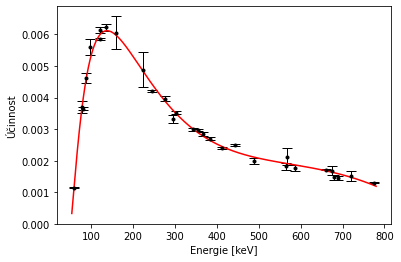

In [58]:

for i in range(1):#sloupce 5
    output = []
    pars, cov = curve_fit(f=func, xdata=energy, ydata=eff, sigma=1./(np.log((yerr*eff))**2))
    coeff_err = np.sqrt(np.diag(cov))
    for i in range(len(pars)):
        output.append('a{0} = {1:.6f} +- {2:.7f} ({3:d} %)'.format(i, pars[i], coeff_err[i], abs(int(coeff_err[i]/pars[i]*100))))

    for i in output:
        print(i)
        
    global eff_param
    eff_param = pars

    #plotovani
    p = np.linspace(min(energy)-5, max(energy)+5, 100000)
    plt.errorbar(energy, eff, yerr=yerr, fmt=".", elinewidth=1, capsize=5, ecolor='black',color='black')
    plt.plot(p, func(p, *pars), c="red")
    #plt.title("Závislost účinnosti na energii")
    plt.ylabel("Účinnost")
    plt.xlabel("Energie [keV]")
    plt.ylim(ymin=0)#omezeni aby vykreslovalo jen kladna y

# parameters:
* a0 = -4.133349 +- 0.6703348 (16 %) 
* a1 = 1.625515 +- 0.2530204 (15 %)
* a2 = -0.313862 +- 0.0474190 (15 %)
* a3 = 0.029817 +- 0.0044139 (14 %)
* a4 = -0.001117 +- 0.0001633 (14 %)
* a5 = 4.123716 +- 0.7052136 (17 %)

In [22]:
fileO = open(r'C:\Users\david\Desktop\maturitni prace\OmassCoefff.txt', 'r')
fileH = open(r'C:\Users\david\Desktop\maturitni prace\HmassCoefff.txt', 'r')
filewater = open(r'C:\Users\david\Desktop\maturitni prace\watermassCoefff.txt', 'r')
fileU = open(r'C:\Users\david\Desktop\maturitni prace\UmassCoefff.txt', 'r')

molar_mass_H = 1.00784
molar_mass_O = 15.999
molar_mass_U = 238.02891

energy_as_x_to_masscoeff_U = []
masscoef_U = []
energy_as_x_to_masscoeff_O = [] #MeV
masscoef_O = [] #(cm2/g)
energy_as_x_to_masscoeff_H = [] #MeV
masscoef_H = [] #(cm2/g)
energy_as_x_to_masscoeff_water = [] #MeV
masscoef_water = [] #(cm2/g)

for line in fileU:
    energy_as_x_to_masscoeff_U.append(float(line[3:14]))
    masscoef_U.append(float(line[15:25]))

for line in fileO:
    energy_as_x_to_masscoeff_O.append(float(line[0:12]))
    masscoef_O.append(float(line[13:22]))

for line in fileH:
    energy_as_x_to_masscoeff_H.append(float(line[1:13]))
    masscoef_H.append(float(line[14:23]))

for line in filewater:
    energy_as_x_to_masscoeff_water.append(float(line[0:12]))
    masscoef_water.append(float(line[13:22]))

In [23]:
def check_energies(energy1, energy2):
    i = 0
    if len(energy1) == len(energy2):
        print("first step")
        for i in range(len(energy2)):
            if energy1[i] == energy2[i]:
                pass
                #print("ok")
            else:
                print("fail in index:{} , {} is not {}".format(i, energy1[i], energy2[i]))
                i = i+1
        return i
    else:
        return "you are fucking idiot"
#energiova osa je stejna

In [24]:
def calculate_correct_masscoeff_of_substance(masscoef1=masscoef_O, masscoef2=masscoef_H, molar_mass1=molar_mass_O, molar_mass2=molar_mass_H, n1=1, n2=2):
    answ_masscoef = []
    print("{}, {}".format(len(masscoef1), len(masscoef2)))
    for i in range(len(masscoef1)):
        mass1 = molar_mass1 * n1
        mass2 = molar_mass2 * n2
        lul = (masscoef1[i] * mass1 + masscoef2[i] * mass2)/(mass1 + mass2)
        answ_masscoef.append(round(lul, 5))#lepe zaokrouhlovat
    return answ_masscoef

h2o_calculated = calculate_correct_masscoeff_of_substance()

36, 36


In [25]:
def exp(masscoeff, density, height):
    x = masscoeff * density * height
    return np.exp(x)

In [26]:
if len(h2o_calculated) == len(masscoef_water):
    print("first step")
    for i in range(len(h2o_calculated)):
        if h2o_calculated[i] == masscoef_water[i]:
            pass
            #print("ok")
        else:
            print("fail in index:{}, {} is not {}".format(i, h2o_calculated[i], masscoef_water[i]))
            #prvnich 5 indexu ok (chyba zaokrouhlovani), pak ale spatny uplne

first step
fail in index:0, 4077.22797 is not 4078.0
fail in index:1, 1375.92123 is not 1376.0
fail in index:2, 617.26546 is not 617.3
fail in index:3, 192.87126 is not 192.9
fail in index:4, 82.77822 is not 82.78
fail in index:5, 42.58734 is not 42.58
fail in index:6, 24.64585 is not 24.64
fail in index:7, 10.3725 is not 10.37
fail in index:8, 5.32915 is not 5.329
fail in index:9, 1.67268 is not 1.673
fail in index:10, 0.80965 is not 0.8096
fail in index:11, 0.37556 is not 0.3756
fail in index:12, 0.26827 is not 0.2683
fail in index:13, 0.22688 is not 0.2269
fail in index:14, 0.20584 is not 0.2059
fail in index:15, 0.18361 is not 0.1837
fail in index:16, 0.17069 is not 0.1707
fail in index:17, 0.15053 is not 0.1505
fail in index:18, 0.13704 is not 0.137
fail in index:19, 0.11866 is not 0.1186
fail in index:20, 0.10614 is not 0.1061
fail in index:23, 0.07866 is not 0.07865
fail in index:27, 0.04941 is not 0.04942


In [27]:
for i in range(1,len(energy_as_x_to_masscoeff_water)):
    if h2o_calculated[i] > h2o_calculated[i-1]:
        print("something wrong at index {} and {}".format(i, i-1))

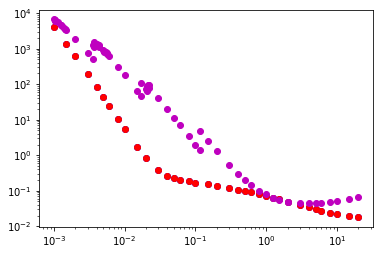

In [28]:
#plotovani
plt.scatter(energy_as_x_to_masscoeff_H, h2o_calculated, c="b")
plt.scatter(energy_as_x_to_masscoeff_water, masscoef_water, c = "r")
plt.scatter(energy_as_x_to_masscoeff_U, masscoef_U, c="m")
plt.yscale('log')
plt.xscale('log')

In [29]:
p = check_energies(energy_as_x_to_masscoeff_U, energy_as_x_to_masscoeff_O)
#u2o_calculated = calculate_correct_masscoeff_of_substance(masscoef_U, masscoef_O, molar_mass_U, molar_mass_O, 2, 1)
print(p)
print(energy_as_x_to_masscoeff_U)
print(energy_as_x_to_masscoeff_O)

you are fucking idiot
[0.001, 0.0010222, 0.0010449, 0.0010449, 0.00115314, 0.0012726, 0.0012726, 0.00135409, 0.0014408, 0.0014408, 0.0015, 0.002, 0.003, 0.0035517, 0.0035517, 0.00363859, 0.0037276, 0.0037276, 0.004, 0.0043034, 0.0043034, 0.005, 0.0051822, 0.0051822, 0.00536198, 0.005548, 0.005548, 0.006, 0.008, 0.01, 0.015, 0.0171663, 0.0171663, 0.02, 0.0209476, 0.0209476, 0.0213487, 0.0217574, 0.0217574, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.115606, 0.115606, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0]
[0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0]


C:\Users\david\AppData\Local\Temp\ipykernel_7152\3670159762.py:8: RuntimeWarning: overflow encountered in exp
  plt.plot(p, moje_fce(np.exp(p), *pars), c="red")
C:\Users\david\AppData\Local\Temp\ipykernel_7152\3670159762.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ymin=0)


(1.0373955157239067e-05, 17400.100952040688)

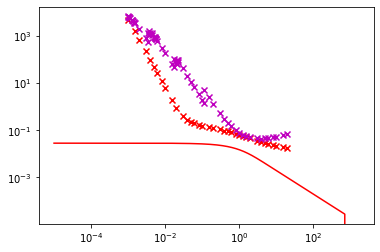

In [57]:
plt.scatter(energy_as_x_to_masscoeff_O, masscoef_O, marker="x", c="r")
plt.scatter(energy_as_x_to_masscoeff_U, masscoef_U, marker="x", c="m")
def moje_fce(x, a, b):
    '''musim opravit'''
    return (a/(x+b))
pars, cov = curve_fit(f=moje_fce, xdata=energy_as_x_to_masscoeff_O, ydata=masscoef_O)
p = np.logspace(min(energy_as_x_to_masscoeff_O)-5, np.log(max(energy_as_x_to_masscoeff_O)+5), 1000000)
plt.plot(p, moje_fce(p, *pars), c="red")
#print(pars)
plt.yscale('log')
plt.xscale('log')
plt.ylim(ymin=0)